In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

## Subset of all data

In [3]:
complete_data = pd.read_csv("car_data_for_price_estimation.csv")

In [4]:
complete_data.country_code.value_counts()

country_code
ZA    460906
PK    329596
AE    135202
KW     58580
SA     44296
LB     19995
Name: count, dtype: int64

In [5]:
complete_data.currency.value_counts()

currency
ZAR    460906
PKR    329596
AED    135202
KWD     58580
SAR     44296
LBP     19995
Name: count, dtype: int64

In [6]:
complete_data[complete_data.country_code == 'ZA'].reset_index(drop=True).to_parquet('car_data_za.parquet')

## EDA

In [7]:
data = pd.read_parquet('car_data_za.parquet')

In [8]:
data

,make_id,model_id,submodel_id,price,mileage,country_code,year,currency,updated_at
0,5,41.0,NaN,179000,93000,ZA,2012,ZAR,2020-02-16 22:50:05.555076+00
1,8,75.0,NaN,409900,39000,ZA,2018,ZAR,2021-01-31 03:07:25.513245+00
2,86,912.0,NaN,20000,800,ZA,1988,ZAR,2019-09-08 21:50:05.766048+00
3,8,75.0,164.0,209000,89000,ZA,2015,ZAR,2021-02-28 22:50:17.57505+00
4,87,954.0,NaN,70000,120000,ZA,2004,ZAR,2019-11-17 22:50:10.245932+00
...,...,...,...,...,...,...,...,...,...
460901,83,881.0,NaN,319990,25000,ZA,2019,ZAR,2021-05-06 06:07:43.670507+00
460902,87,954.0,NaN,317117,1,ZA,2021,ZAR,2021-03-18 22:50:21.601239+00
460903,86,NaN,NaN,164995,22500,ZA,2019,ZAR,2020-12-15 22:50:24.012797+00
460904,49,1050.0,NaN,3299995,600,ZA,2019,ZAR,2019-10-16 21:50:05.318881+00


In [9]:
data.describe()

,make_id,model_id,submodel_id,price,mileage,year
count,460906.000000,404123.000000,36735.000000,4.609060e+05,4.609060e+05,460906.000000
mean,56.368910,605.949006,580.822621,4.851168e+05,1.169368e+05,2012.607636
std,28.093863,319.238459,329.455750,1.817058e+08,3.311292e+06,6.732141
min,1.000000,1.000000,6.000000,1.000000e+02,0.000000e+00,1930.000000
25%,27.000000,298.000000,270.000000,8.900000e+04,3.576200e+04,2010.000000
50%,60.000000,661.000000,514.000000,1.500000e+05,8.600000e+04,2014.000000
75%,86.000000,927.000000,863.000000,2.490000e+05,1.450000e+05,2017.000000
max,92.000000,1103.000000,1099.000000,1.233456e+11,1.200012e+09,2060.000000


In [10]:
data.duplicated().sum()

6007

In [11]:
data[data.duplicated(keep=False)].sort_values(by=['make_id', 'model_id', 'submodel_id', 'price', 'mileage',
       'country_code', 'year', 'currency', 'updated_at'])

,make_id,model_id,submodel_id,price,mileage,country_code,year,currency,updated_at
271828,3,20.0,NaN,129900,106253,ZA,2012,ZAR,2019-08-03 21:50:06.15468+00
324287,3,20.0,NaN,129900,106253,ZA,2012,ZAR,2019-08-03 21:50:06.15468+00
34684,5,33.0,NaN,110000,75000,ZA,2011,ZAR,2020-09-09 21:50:06.784971+00
400055,5,33.0,NaN,110000,75000,ZA,2011,ZAR,2020-09-09 21:50:06.784971+00
79840,5,33.0,NaN,119900,125000,ZA,2012,ZAR,2020-07-26 21:50:06.441575+00
...,...,...,...,...,...,...,...,...,...
255581,88,981.0,NaN,510000,54000,ZA,2016,ZAR,2020-03-11 22:50:06.642642+00
74980,88,981.0,NaN,789900,53383,ZA,2019,ZAR,2020-12-05 22:50:20.709201+00
227750,88,981.0,NaN,789900,53383,ZA,2019,ZAR,2020-12-05 22:50:20.709201+00
255559,88,981.0,NaN,799900,7600,ZA,2019,ZAR,2020-08-03 21:50:08.772918+00


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.make_id.unique()

array([ 5,  8, 86, 87, 37, 68, 27, 17, 66, 84, 60, 75, 21, 49, 83, 64, 44,
       35, 71, 40, 25, 88, 58, 43, 50, 34,  3, 63, 42, 73, 54, 19, 92, 18,
       82, 16,  4, 74, 38, 22, 28, 81, 24,  6, 76, 41, 77, 62, 48, 15, 30,
       78, 90, 55, 47, 13,  7,  1, 52, 20, 36, 59, 14,  2, 57, 67, 56, 80,
       29, 65,  9], dtype=int64)

### Outlier removal - Price

<Axes: xlabel='price'>

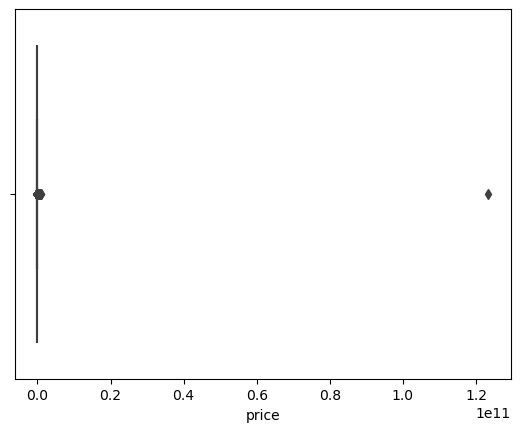

In [14]:
sns.boxplot(x=data['price'])

In [15]:
data['price'].quantile(0.95)

529895.3999999999

In [16]:
data['price'].quantile(0.99)

969995.0

In [17]:
data['price'].max()

123345567779

<Axes: xlabel='price'>

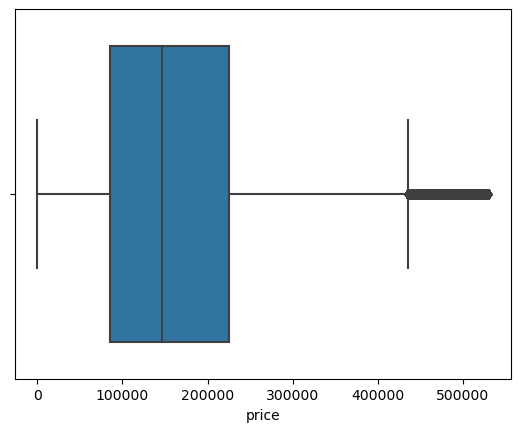

In [18]:
sns.boxplot(x=data[data.price <= data.price.quantile(0.95)]['price'])

In [19]:
q3, q1 = np.percentile(data['price'], [75, 25])

In [20]:
IQR = q3 - q1

In [21]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

In [22]:
upper_bound

486497.5

In [23]:
lower_bound

-149498.5

In [24]:
data = data[data.price <= data['price'].quantile(0.95)]

In [25]:
data.shape

(432154, 9)

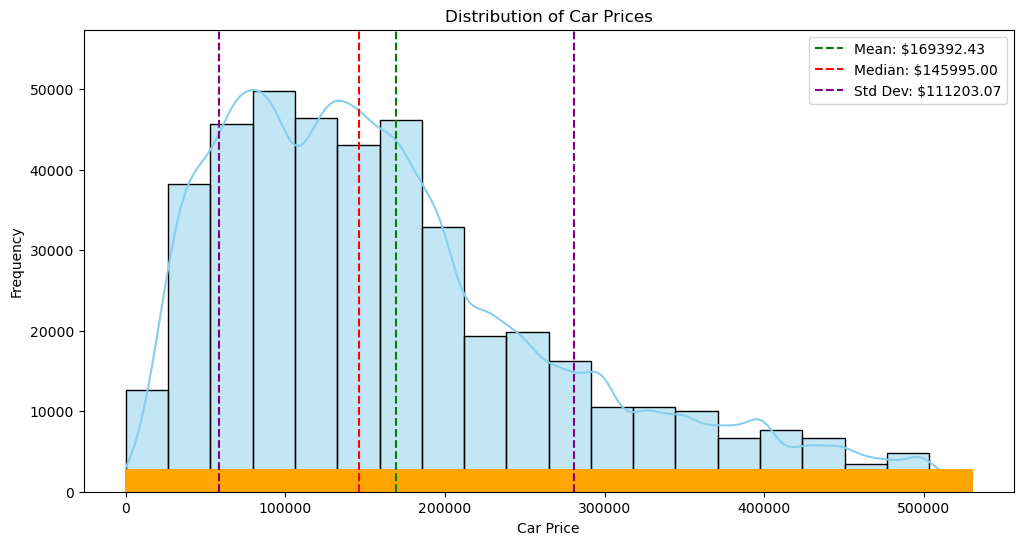

In [26]:
plt.figure(figsize=(12, 6))

# Plot the distribution of car prices
sns.histplot(data['price'], bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

# Add a rug plot to show individual data points
sns.rugplot(data['price'], color='orange', height=0.05)

# Add summary statistics (mean, median, and standard deviation)
mean_price = data['price'].mean()
median_price = data['price'].median()
std_price = data['price'].std()
plt.axvline(mean_price, color='green', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: ${median_price:.2f}')
plt.axvline(mean_price + std_price, color='purple', linestyle='--', label=f'Std Dev: ${std_price:.2f}')
plt.axvline(mean_price - std_price, color='purple', linestyle='--')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Outlier removal - Mileage

<Axes: xlabel='mileage'>

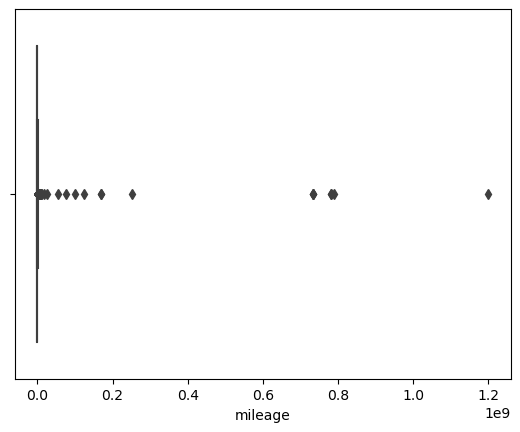

In [27]:
sns.boxplot(x=data['mileage'])

In [28]:
data['mileage'].quantile(0.95)

255069.24999999965

In [29]:
data['mileage'].quantile(0.99)

358000.0

In [30]:
data['mileage'].max()

1200012000

<Axes: xlabel='mileage'>

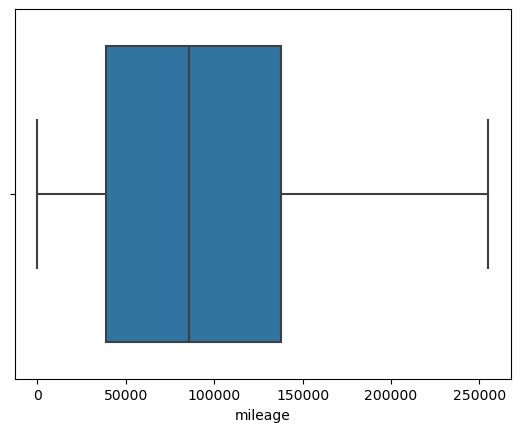

In [31]:
sns.boxplot(x=data[data.mileage <= data.mileage.quantile(0.95)]['mileage'])

<Axes: xlabel='mileage'>

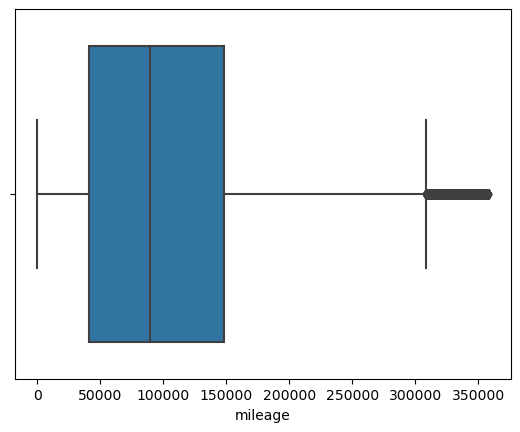

In [32]:
sns.boxplot(x=data[data.mileage <= data.mileage.quantile(0.99)]['mileage'])

In [33]:
q3, q1 = np.percentile(data['mileage'], [75, 25])

In [34]:
IQR = q3 - q1

In [35]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

In [36]:
upper_bound

313182.75

In [37]:
lower_bound

-121971.25

In [38]:
data = data[data.mileage <= upper_bound]

In [39]:
data.shape

(424038, 9)

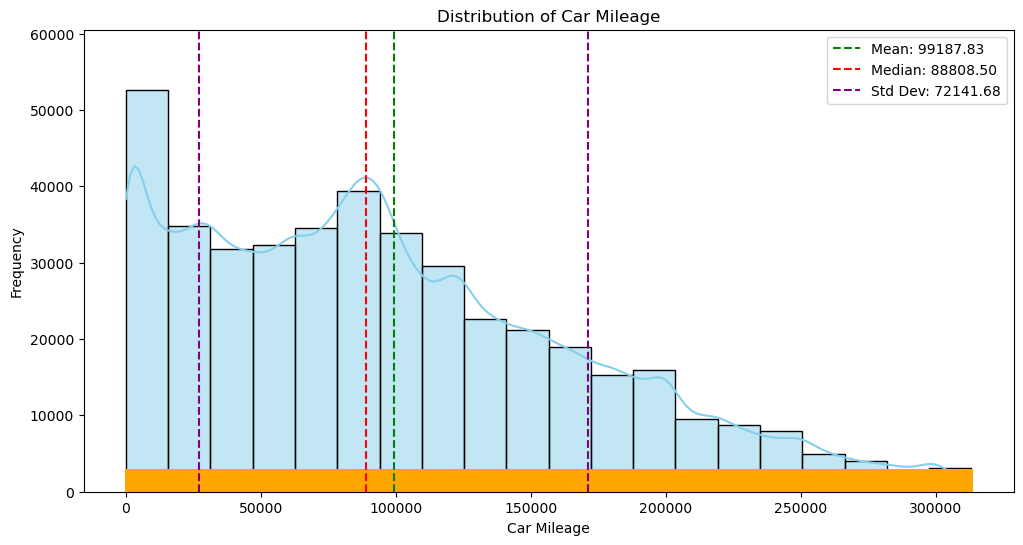

In [40]:
plt.figure(figsize=(12, 6))

# Plot the distribution of car prices
sns.histplot(data['mileage'], bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Car Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Car Mileage')

# Add a rug plot to show individual data points
sns.rugplot(data['mileage'], color='orange', height=0.05)

# Add summary statistics (mean, median, and standard deviation)
mean_price = data['mileage'].mean()
median_price = data['mileage'].median()
std_price = data['mileage'].std()
plt.axvline(mean_price, color='green', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: {median_price:.2f}')
plt.axvline(mean_price + std_price, color='purple', linestyle='--', label=f'Std Dev: {std_price:.2f}')
plt.axvline(mean_price - std_price, color='purple', linestyle='--')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Outlier removal - Year

<Axes: >

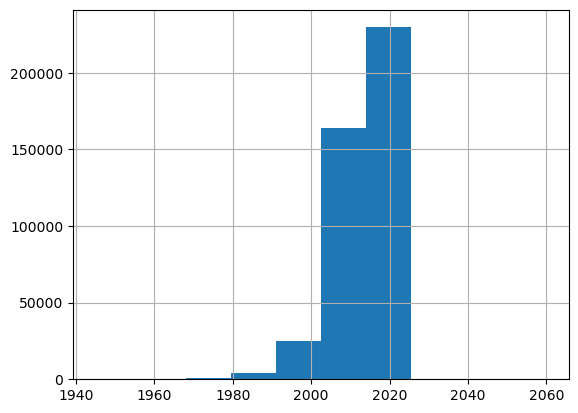

In [41]:
data.year.hist()

In [42]:
data.year.describe()

count    424038.000000
mean       2012.489270
std           6.600035
min        1945.000000
25%        2010.000000
50%        2014.000000
75%        2017.000000
max        2060.000000
Name: year, dtype: float64

In [43]:
data = data[data.year <= 2023]

In [44]:
data.shape

(424034, 9)

In [45]:
data['age'] = 2023 - data['year']

In [46]:
data.describe()

,make_id,model_id,submodel_id,price,mileage,year,age
count,424034.000000,370828.000000,30985.000000,424034.000000,424034.000000,424034.000000,424034.000000
mean,56.462475,605.611184,588.615620,171158.004007,99188.076334,2012.489055,10.510945
std,28.096851,317.975817,337.258679,111147.786553,72141.943135,6.599549,6.599549
min,1.000000,1.000000,6.000000,100.000000,0.000000,1945.000000,1.000000
25%,27.000000,293.000000,270.000000,86000.000000,40000.000000,2010.000000,6.000000
50%,63.000000,675.000000,550.000000,149900.000000,88813.000000,2014.000000,9.000000
75%,86.000000,930.000000,969.000000,229000.000000,145400.000000,2017.000000,13.000000
max,92.000000,1101.000000,1094.000000,529895.000000,313154.000000,2022.000000,78.000000


### Price vs make_id

In [47]:
# Calculate average price by car make
make_gp = data.groupby('make_id')['price'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Car Company vs Average Price')

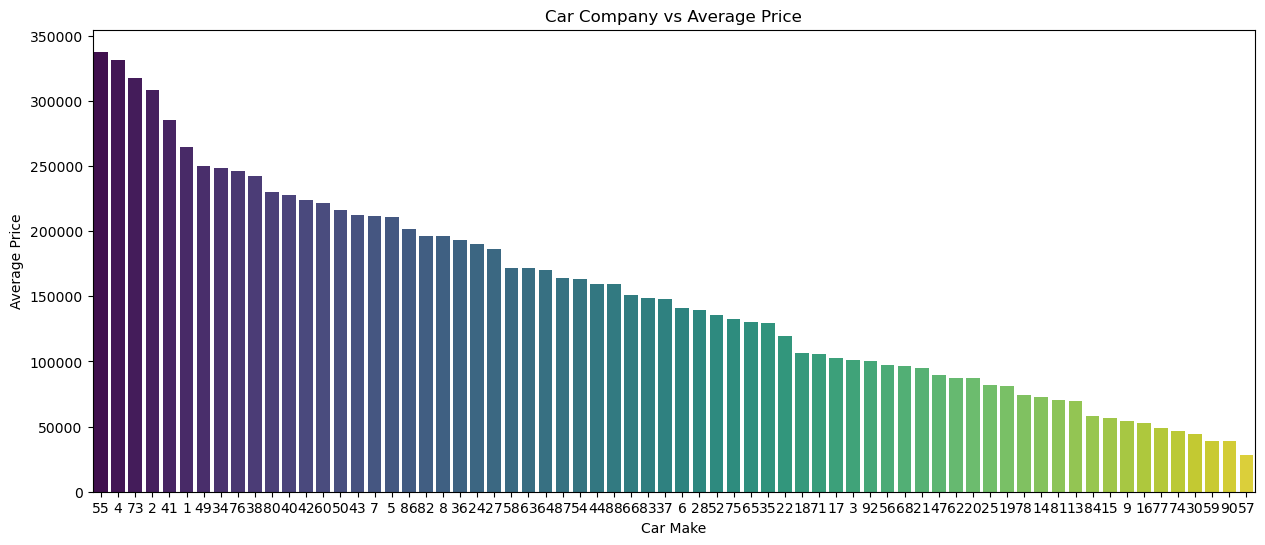

In [48]:
plt.figure(figsize=(15, 6))
sns.barplot(x=make_gp.index, y=make_gp.values, palette='viridis', order=make_gp.index)
# plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Car Company vs Average Price')

### Price vs model_id

In [49]:
# Calculate average price by car make
model_gp = data.groupby(['make_id', 'model_id'])['price'].mean().sort_index()

In [50]:
model_gp

make_id  model_id
1        1.0         337441.428571
         2.0         248099.466667
         3.0         425000.000000
3        9.0          49458.333333
         10.0         36414.285714
                         ...      
88       980.0        81895.083333
         981.0       136621.959302
92       996.0        74062.906250
         997.0        69949.500000
         998.0       124074.252336
Name: price, Length: 571, dtype: float64

### Price vs Mileage

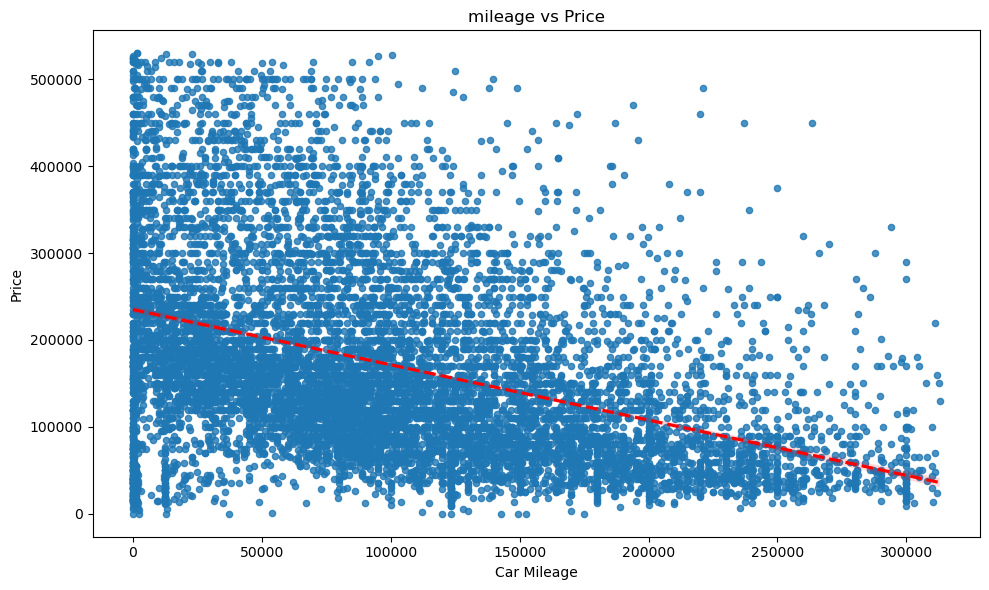

In [51]:
# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Plot regression plots for selected features
sns.regplot(x='mileage', y='price', data=data.sample(10000), scatter_kws={"s": 20}, line_kws={"color": "red", 'linestyle': '--'})
plt.title(f'mileage vs Price')
plt.ylabel('Price')
plt.xlabel('Car Mileage')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

### Price vs Age

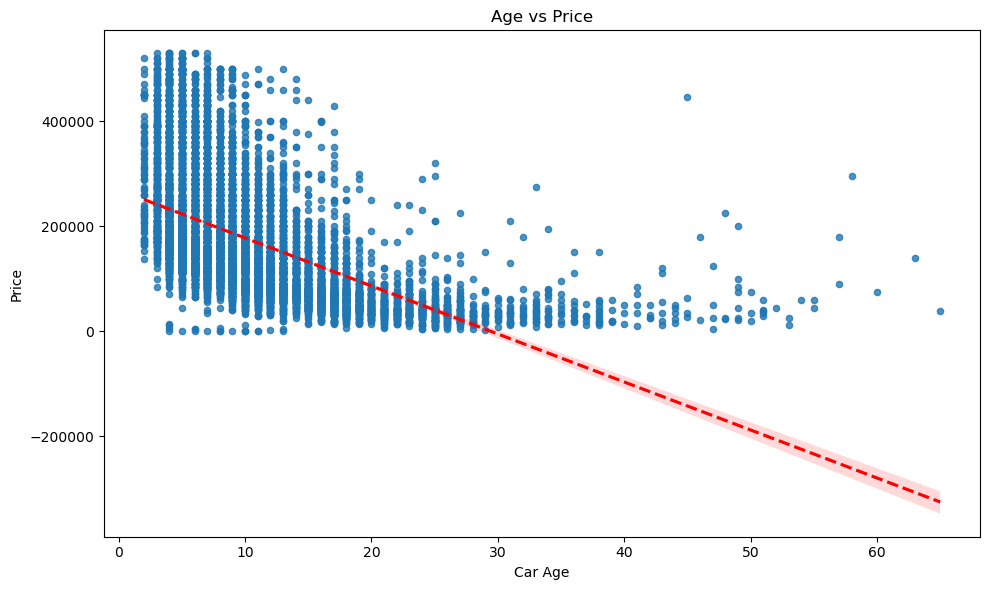

In [52]:
# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Plot regression plots for selected features
sns.regplot(x='age', y='price', data=data.sample(10000), scatter_kws={"s": 20}, line_kws={"color": "red", 'linestyle': '--'})
plt.title(f'Age vs Price')
plt.ylabel('Price')
plt.xlabel('Car Age')
# plt.ylim((0, data.price.max()))

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

## Data Cleaning

In [53]:
data.shape

(424034, 10)

In [54]:
data.columns

Index(['make_id', 'model_id', 'submodel_id', 'price', 'mileage',
       'country_code', 'year', 'currency', 'updated_at', 'age'],
      dtype='object')

In [55]:
data.isna().sum()

make_id              0
model_id         53206
submodel_id     393049
price                0
mileage              0
country_code         0
year                 0
currency             0
updated_at           0
age                  0
dtype: int64

In [56]:
data.isna().sum() / len(data)

make_id         0.000000
model_id        0.125476
submodel_id     0.926928
price           0.000000
mileage         0.000000
country_code    0.000000
year            0.000000
currency        0.000000
updated_at      0.000000
age             0.000000
dtype: float64

In [57]:
data.dropna(subset=['model_id'], inplace=True)

In [58]:
data.isna().sum() / len(data)

make_id         0.000000
model_id        0.000000
submodel_id     0.916444
price           0.000000
mileage         0.000000
country_code    0.000000
year            0.000000
currency        0.000000
updated_at      0.000000
age             0.000000
dtype: float64

In [59]:
data.dtypes

make_id           int64
model_id        float64
submodel_id     float64
price             int64
mileage           int64
country_code     object
year              int64
currency         object
updated_at       object
age               int64
dtype: object

In [60]:
data['model_id'] = data['model_id'].astype('int')
data['price'] = data['price'].astype('float')
data['mileage'] = data['mileage'].astype('float')

In [61]:
data.dtypes

make_id           int64
model_id          int32
submodel_id     float64
price           float64
mileage         float64
country_code     object
year              int64
currency         object
updated_at       object
age               int64
dtype: object

In [62]:
(data.make_id.value_counts() == 1).sum()

1

In [63]:
data.make_id.value_counts()[data.make_id.value_counts() == 1].index

Index([65], dtype='int64', name='make_id')

In [64]:
data[data.make_id.isin([65])].index

Index([399343], dtype='int64')

In [65]:
data = data.drop(data[data.make_id.isin([65])].index)

In [66]:
X = data.drop(columns=['price', 'submodel_id', 'year', 'currency', 'country_code', 'updated_at'])
y = data['price']

In [67]:
X.shape

(370827, 4)

In [68]:
y.shape

(370827,)

## Model training

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split

In [70]:
def modelresults(target, predictions):
    mae = mean_absolute_error(target, predictions)
    mse = mean_squared_error(target, predictions)
    r2 = r2_score(target, predictions)
    
    print('Mean absolute error on model is {:.4f}'.format(mae))
    print('')
    print('Mean squared error on model is {:.4f}'.format(mse))
    print('')
    print('The r2 score on model is {:.4f}'.format(r2))
    
    return mae, mse, r2

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=X['make_id'])

In [72]:
print(f"{X_train.shape} -- {y_train.shape}")
print(f"{X_test.shape} -- {y_test.shape}")
# print(f"{X_val.shape} -- {y_val.shape}")

(315202, 4) -- (315202,)
(55625, 4) -- (55625,)


In [73]:
import mlflow
from mlflow.models import infer_signature

mlflow.set_tracking_uri(uri="http://localhost:8080")

In [74]:
# Create a new MLflow Experiment
mlflow.set_experiment("Seez assignment")

<Experiment: artifact_location='mlflow-artifacts:/342971519676902643', creation_time=1708194300853, experiment_id='342971519676902643', last_update_time=1708194300853, lifecycle_stage='active', name='Seez assignment', tags={}>

In [75]:
def log_mlflow(params, mae, mse, r2, model, model_name='new_model', description='New model'):
    # Start an MLflow run
    with mlflow.start_run():
        # Log the hyperparameters
        mlflow.log_params(params)

        # Log the loss metric
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R2", r2)

        # Set a tag that we can use to remind ourselves what this run was for
        mlflow.set_tag("Training Info", description)

        # Infer the model signature
        signature = infer_signature(X_train, model.predict(X_train))

        # Log the model
        model_info = mlflow.sklearn.log_model(
            sk_model=dt,
            artifact_path="seez",
            signature=signature,
            input_example=X_train,
            registered_model_name=model_name,
        )

### Baseline - Decision Tree

In [76]:
params = {'random_state' : 42}

In [77]:
dt = DecisionTreeRegressor(**params)

In [78]:
dt = dt.fit(X_train, y_train)

In [79]:
y_pred = dt.predict(X_test)

In [80]:
mae, mse, r2 = modelresults(y_test.astype('float'), y_pred)

Mean absolute error on model is 32128.0313

Mean squared error on model is 2713599124.0549

The r2 score on model is 0.7822


In [81]:
log_mlflow(params, mae, mse, r2, model=dt, model_name='dt_model', description='Baseline Decision Tree model')

C:\Users\Akshay\anaconda3\lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\Akshay\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'dt_model' already exists. Creating a new version

### Random Forest

In [82]:
params = {'n_estimators' : 100, 'random_state' : 42}

In [83]:
rf = RandomForestRegressor(**params, n_jobs=-1)

In [84]:
rf = rf.fit(X_train, y_train)

In [85]:
y_pred = rf.predict(X_test)

In [86]:
mae, mse, r2 = modelresults(y_test.astype('float'), y_pred)

Mean absolute error on model is 29331.9683

Mean squared error on model is 2085653499.5618

The r2 score on model is 0.8326


In [87]:
log_mlflow(params, mae, mse, r2, model=rf, model_name='rf_model', description='Random Forest with default params')

C:\Users\Akshay\anaconda3\lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'rf_model' already exists. Creating a new version of this model...
2024/02/18 02:00:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf_model, versi

### Random Forest with GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

In [90]:
model = RandomForestRegressor(random_state= 42, n_jobs=-1)

In [91]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [92]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [93]:
y_pred = best_model.predict(X_test)

In [94]:
mae, mse, r2 = modelresults(y_test.astype('float'), y_pred)

Mean absolute error on model is 28303.6199

Mean squared error on model is 1888516529.9948

The r2 score on model is 0.8484


In [95]:
log_mlflow(grid_search.best_params_, mae, mse, r2, model=best_model, model_name='rf_gscv_model', description='Random Forest with gridsearchcv')

C:\Users\Akshay\anaconda3\lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'rf_gscv_model' already exists. Creating a new version of this model...
2024/02/18 02:10:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf_gscv_mo

### Random Forest with Optuna Hyperparameter tuning

In [96]:
import optuna

In [97]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state= 42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # metric  to optimize
    score = mean_squared_error(y_test, y_pred)
    
    return score

In [98]:
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-02-18 02:10:57,616] A new study created in memory with name: no-name-3992596f-4cb1-412c-821c-58f0663ddce8


In [99]:
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-02-18 02:12:06,027] Trial 4 finished with value: 3062720529.456287 and parameters: {'n_estimators': 117, 'max_depth': 11, 'min_samples_split': 30, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 4 with value: 3062720529.456287.
[I 2024-02-18 02:12:22,192] Trial 1 finished with value: 1916565962.2455275 and parameters: {'n_estimators': 101, 'max_depth': 43, 'min_samples_split': 29, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 1916565962.2455275.
[I 2024-02-18 02:12:28,279] Trial 0 finished with value: 2152670655.151058 and parameters: {'n_estimators': 134, 'max_depth': 32, 'min_samples_split': 25, 'min_samples_leaf': 31, 'max_features': 'log2'}. Best is trial 1 with value: 1916565962.2455275.
[I 2024-02-18 02:14:03,480] Trial 12 finished with value: 1974820741.451262 and parameters: {'n_estimators': 140, 'max_depth': 47, 'min_samples_split': 16, 'min_samples_leaf': 14, 'max_features': 'log2'}. Best is trial 1 with value: 1916565962.2

In [100]:
# Print the best parameters found 
print("Best trial:")
trial = study.best_trial

print("Value: {:.4f}".format(trial.value))

print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
Value: 1848082928.1706
Params: 
    n_estimators: 311
    max_depth: 20
    min_samples_split: 2
    min_samples_leaf: 3
    max_features: log2


In [101]:
rf = RandomForestRegressor(**study.best_trial.params, n_jobs=-1)

In [102]:
rf = rf.fit(X_train, y_train)

In [103]:
y_pred = rf.predict(X_test)

In [104]:
mae, mse, r2 = modelresults(y_test.astype('float'), y_pred)

Mean absolute error on model is 28356.5138

Mean squared error on model is 1847139532.2449

The r2 score on model is 0.8518


In [122]:
import joblib

In [123]:
joblib.dump(study, "seez_optuna_study.pkl")

['seez_optuna_study.pkl']

In [105]:
log_mlflow(study.best_trial.params, mae, mse, r2, model=rf, model_name='rf_optuna_model', description='Random Forest with Optuna')

C:\Users\Akshay\anaconda3\lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'rf_optuna_model' already exists. Creating a new version of this model...
2024/02/18 02:25:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf_optun

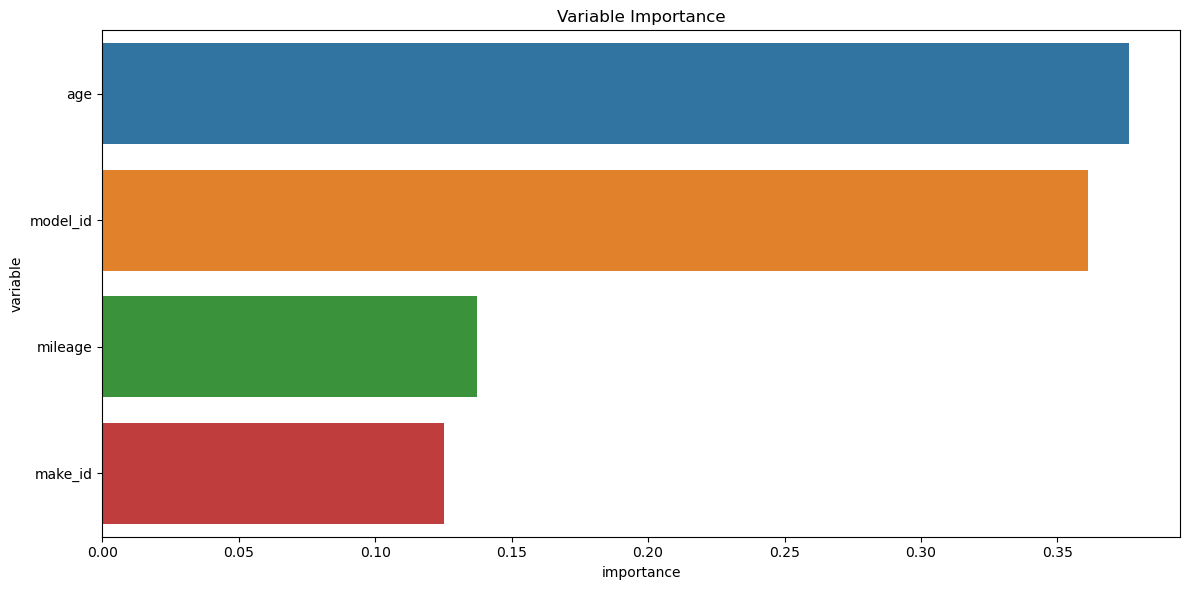

In [106]:
rankings = rf.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(x="importance",
            y="variable",
            data=importance)
plt.title('Variable Importance')
plt.tight_layout()

## Answering below questions - 
- Make sure that for the same MMS (or MM) combination, the higher the number of miles, the lower the price for the same year.
- Make sure that for the same MMS and year (or MMY) combination, the lower the year, the lower the price, do miles matter?
- How can you enforce monotonicity of year and/or mileage with respect to the price?

Only way to ensure above requirement is through enforcing these constraints in training data. We need to find and remove the data from training data which does not follow above requirements. But for that we need more features as with given features it is not possible to identify bad data.

Analysing training data ->

In [107]:
uniq_combo = pd.DataFrame({
    'make_id' : [87, 8],
    'model_id' : [954, 75],
    'submodel_id' : [1092, 169]
})

In [108]:
uniq_combo

,make_id,model_id,submodel_id
0,87,954,1092
1,8,75,169


Make ID: 87, Model ID: 954, Submodel ID: 1092
Make ID: 8, Model ID: 75, Submodel ID: 169


C:\Users\Akshay\AppData\Local\Temp\ipykernel_27844\2543337940.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


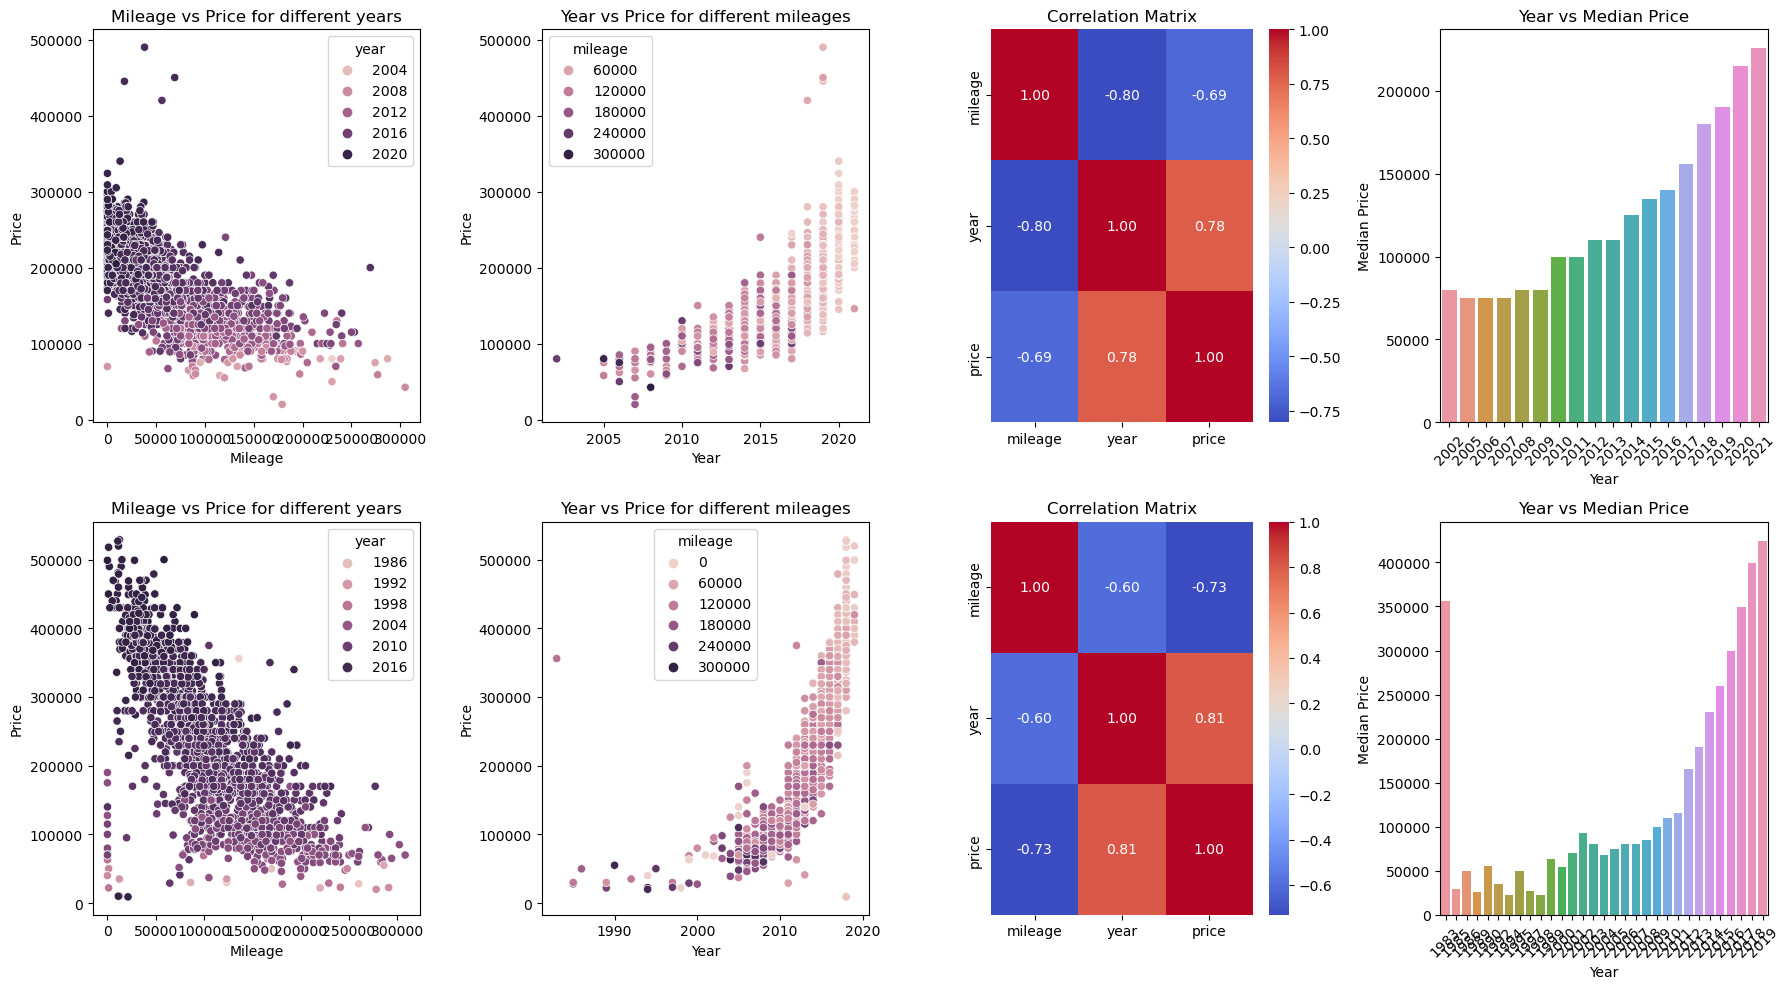

In [109]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for index, row in uniq_combo.iterrows():
    make_id = row['make_id']
    model_id = row['model_id']
    submodel_id = row['submodel_id']
    
    print(f'Make ID: {make_id}, Model ID: {model_id}, Submodel ID: {submodel_id}')
    
    filtered_data = data[(data.make_id == make_id) & (data.model_id == model_id) & (data.submodel_id == submodel_id)]
    agg_data = filtered_data.groupby('year')['price'].agg(['mean', 'median']).reset_index()
    
    # Scatter plot between 'mileage' and 'price' for different years
    sns.scatterplot(data=filtered_data, x='mileage', y='price', hue='year', ax=axes[index, 0])
    axes[index, 0].set_title('Mileage vs Price for different years')
    axes[index, 0].set_xlabel('Mileage')
    axes[index, 0].set_ylabel('Price')
    
    # Scatter plot between 'year' and 'price' for different mileage
    sns.scatterplot(data=filtered_data, x='year', y='price', hue='mileage', ax=axes[index, 1])
    axes[index, 1].set_title('Year vs Price for different mileages')
    axes[index, 1].set_xlabel('Year')
    axes[index, 1].set_ylabel('Price')
    
    # Correlation matrix
    correlation_matrix = filtered_data[['mileage', 'year', 'price']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[index, 2])
    axes[index, 2].set_title('Correlation Matrix')
    
    sns.barplot(agg_data, x='year', y='median', ax=axes[index, 3])
    axes[index, 3].set_title('Year vs Median Price')
    axes[index, 3].set_xlabel('Year')
    axes[index, 3].set_ylabel('Median Price')
    axes[index, 3].tick_params(axis='x', rotation=45)
    
    # Additional formatting
    # plt.suptitle(f'Make ID: {make_id}, Model ID: {model_id}', fontsize=16)
    plt.tight_layout()
    
# Show plot
plt.show()

Understanding what models has learned from current training data

In [110]:
X_train[(X_train.make_id == 87) & (X_train.model_id == 954)].describe()

,make_id,model_id,mileage,age
count,34468.0,34468.0,34468.000000,34468.000000
mean,87.0,954.0,76468.507717,8.219247
std,0.0,0.0,61813.276981,4.610220
min,87.0,954.0,0.000000,2.000000
25%,87.0,954.0,27000.000000,5.000000
50%,87.0,954.0,67000.000000,7.000000
75%,87.0,954.0,107000.000000,10.000000
max,87.0,954.0,313000.000000,47.000000


In [111]:
import random

In [112]:
synthetic_data = pd.DataFrame({
    'make_id' : [87] * 100,
    'model_id' : [954] * 100,
    'mileage' : random.sample(range(0, 100000), 100),
    'age' : [7] * 100
})

In [113]:
synthetic_data_pred = rf.predict(synthetic_data)

In [114]:
synthetic_data_all = pd.concat([synthetic_data, pd.DataFrame(synthetic_data_pred)], axis=1)

In [115]:
synthetic_data_all.head(5)

,make_id,model_id,mileage,age,0
0,87,954,68742,7,156971.160343
1,87,954,33880,7,162770.321421
2,87,954,91594,7,149488.493094
3,87,954,18434,7,164809.727818
4,87,954,67401,7,154245.732840


<Axes: xlabel='mileage', ylabel='0'>

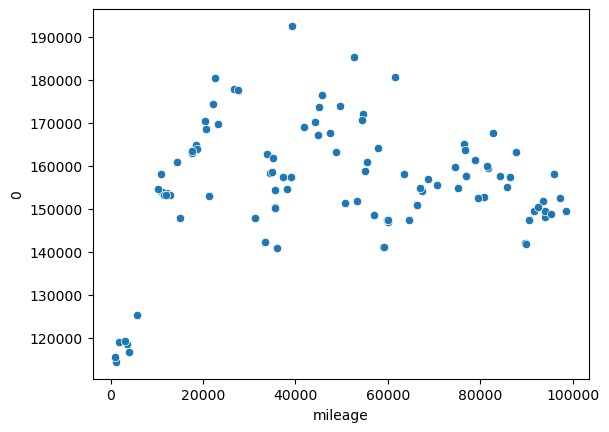

In [116]:
sns.scatterplot(synthetic_data_all, x='mileage', y=0)

In [117]:
synthetic_data = pd.DataFrame({
    'make_id' : [87] * 40,
    'model_id' : [954] * 40,
    'mileage' : [67000] * 40,
    'age' : random.sample(range(2, 47), 40)
})

In [118]:
synthetic_data_pred = rf.predict(synthetic_data)

In [119]:
synthetic_data_all = pd.concat([synthetic_data, pd.DataFrame(synthetic_data_pred)], axis=1)

In [120]:
synthetic_data_all.head(5)

,make_id,model_id,mileage,age,0
0,87,954,67000,28,36769.866410
1,87,954,67000,6,162222.953025
2,87,954,67000,12,98611.976790
3,87,954,67000,21,56729.897310
4,87,954,67000,31,34801.570604


<Axes: xlabel='age', ylabel='0'>

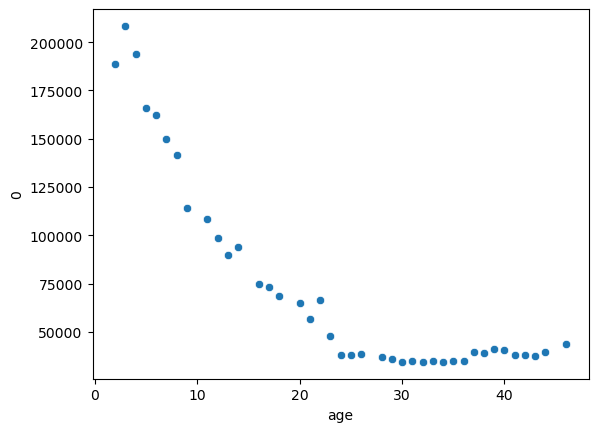

In [121]:
sns.scatterplot(synthetic_data_all, x='age', y=0)